<b>Linear regression with numpy</b>

<b>Summary</b>

<hr>
Population mean: $\mu = {\sum_{i=1}^{n} x_{i} \over N}$

Sample mean: $\bar{x} = {\sum_{i=1}^{n} x_{i} \over n}$

<hr>
Mean deviation  = ${\sum_{i=1}^{n} |x_{i}-\bar{x}| \over n}$
<hr>

Population variance: $\sigma^2={\sum_{i=1}^{n} (x_{i}-\mu)^2 \over N}$

N - dimension of population

Sample variance: $S^2={\sum_{i=1}^{n} (x_{i}-\bar{x})^2 \over n-1}$ 

n - dimension of sample

(using n-1 instead of n gives a better estimation of population variance)
<hr>

Standard deviation for population: $\sigma = \sqrt{\sum_{i=1}^{n}{(x_i - \mu)}^2 \over n}$

Standard deviation for a sample:  $S = \sqrt{\sum_{i=1}^{n}{(x_i - \bar{x})}^2 \over n - 1}$

In numpy, divizor n-1 is coded with coef DDOF = 1
(Delta Degrees of Freedom)
<hr>

Z-score(how many std dev above/below the mean):

Population: $Z = \frac { x-\mu }{ \sigma  } \\ $

Sample: $Z= \frac { x-\overline { x }  }{ S }$

<hr>

Correlation coef. (population) (Pearson):

$
\begin{align}
r=&\frac { 1 }{ n } \sum _{ i=1 }^{ n }{ \left( \frac { { x }_{ i }-{ \mu  }_{ x } }{ { \sigma  }_{ x } }  \right) \left( \frac { { y }_{ i }-{ \mu  }_{ y } }{ { \sigma  }_{ y } }  \right)  }\quad(1)\\
r=&\frac { 1 }{ n } \sum _{ i=1 }^{ n }{ { Z }_{ { x }_{ i } }{ Z }_{ { y }_{ i } } }\quad(2)\\
\end{align}
$

Correlation coef. (sample) (Pearson):

$
\begin{align}
r=&\frac { 1 }{ n-1 } \sum _{ i=1 }^{ n }{ \left( \frac { { x }_{ i }-\bar { x }  }{ { S }_{ x } }  \right) \left( \frac { { y }_{ i }-\bar { y }  }{ { S }_{ y } }  \right) }\quad(1')\\
r=&\frac { 1 }{ n-1 } \sum _{ i=1 }^{ n }{ { Z }_{ { x }_{ i } }{ Z }_{ { y }_{ i } } }\quad(2')
\end{align}
$
<hr>

Linear regression

$
\widehat { y } = mx+b,\quad regression\quad line\\ 
$

Method 1

$
m=r\frac { { S }_{ y } }{ { S }_{ x } } \quad(3),\\
{ S }_{ y }, { S }_{ x }-std\quad devs\quad of\quad y,\quad x\quad values\quad \\ 
$

Method 2

$
m=\frac { \overline { xy } -\overline { x } \times \overline { y }  }{ \overline { xx } -\overline { x } \times \overline { x }  } \\ 
m=\frac { \overline { xy } -\overline { x } \times \overline { y }  }{ \overline { { x }^{ 2 } } -     { \left( \overline { x }  \right)  }^{ 2 } }\quad(4) 
$

$
point\quad (\overline { x } ,\overline { y } )\quad \in \quad regression\quad line,\quad\\
\overline { x } ,\overline { y } \quad are\quad means(averages)\quad of\quad x, y\quad values
$

so

$
b=\overline { y } -m\overline { x }\quad (5)
$


<br>
Application:

In [3]:
import numpy as np
from matplotlib import pyplot as plt

#data points
data = np.array([
    [1, 2],
    [1,10],
    [2, 3],
    [3, 6],
    [5, 8],
    [7, 14]
])

#transpose data
#[1 1 2 3 5 7] [ 2 10  3  6  8 14]
x, y = data.T

#Delta Degrees of Freedom
#divizor of standard deviation is n - DDOF
#so DDOF = 0 means population standard deviation
#and DDOF = 1 is used for sample standard deviation
DDOF = 0

#mean
x_m = np.mean(x)
y_m = np.mean(y)

#std. dev. 
s_x = np.std(x,ddof=DDOF)
s_y = np.std(y,ddof=DDOF)

n = len(data)

#sum of product of z-scores for (2) (2')
s = 0
for i,j in data:
    z_x = (i - x_m)/s_x
    z_y = (j - y_m)/s_y
    s = s + z_x*z_y

#(1) (1')
r = (1/(n-DDOF)) * s   
print("r =",r)

#(2) (2')
r = np.corrcoef(x,y)[0,1]
print("r =",r)
print("the above two values of r must be the same")

#slope of regression line (3)
m = r * s_y/s_x
print("m =",m)

xy_values = []
x_sq_values = []
for i,j in data:
    xy_values.append(i*j)
    x_sq_values.append(i*i)
#print(xy_values,x_sq_values)

xy_m = np.mean(xy_values)
x_sq_m = np.mean(x_sq_values)
#x_m_sq = x_m * x_m

#slope (4)
m = (xy_m - x_m*y_m)/(x_sq_m - x_m*x_m)
print("m =",m)

print("the above slopes(m) must be the same")

#y intercept
b = y_m - m*x_m

print("y = % sx + %s" % (m,b))


r = 0.7016574136745289
r = 0.7016574136745292
the above two values of r must be the same
m = 1.3121387283236994
m = 1.3121387283236994
the above slopes(m) must be the same
y = 1.3121387283236994x + 3.011560693641619


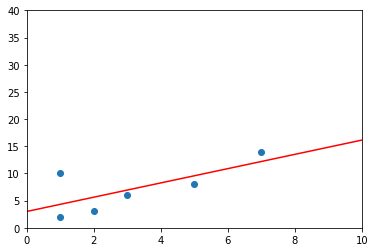

In [4]:
plt.scatter(x,y)

# Two points (x1, y1), (x2, y2) that define line y = mx + b
(x1, y1), (x2, y2) = (0, b), (10, 10*m + b)
plt.plot([x1, x2], [y1, y2], 'r-')

plt.xlim(right=10)  # adjust the right leaving left unchanged
plt.xlim(left=0)  # adjust the left leaving right unchanged.
#plt.ylim(top=50)
plt.ylim(0, 40)     # set the ylim to bottom, top

plt.show()
